In [1]:
import os
import skimage.io
import matplotlib.pyplot as plt
import numpy as np

sign_path = './mathop/'
sign_names = [nm for nm in os.listdir(sign_path) if '.png' in nm]  # make sure to only load .png
sign_names.sort()  # sort file names
ic_sign = skimage.io.imread_collection([os.path.join(sign_path, nm) for nm in sign_names])
sign_img = skimage.io.concatenate_images(ic_sign)

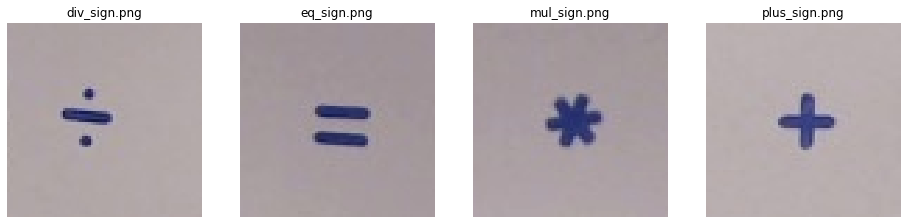

In [2]:
fig, axes = plt.subplots(1, sign_img.shape[0], figsize=(16, 4))
for ax, im, nm in zip(axes.ravel(), sign_img, sign_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)   

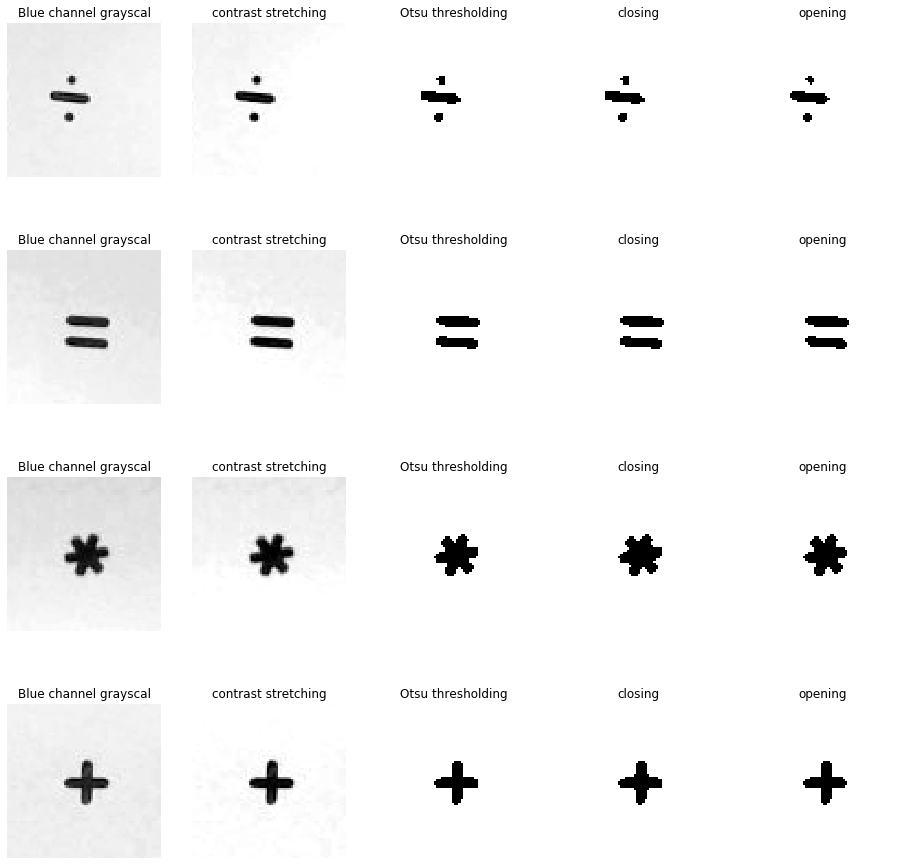

In [3]:
from skimage.filters import threshold_otsu
from skimage import morphology
from skimage import exposure

binary_signs = []

fig, ax = plt.subplots(4, 5, figsize=(16, 16))
for ind, im in zip(range(4), sign_img):
    
    img = skimage.color.rgb2gray(im)
    
    ax[ind,0].imshow(img, cmap='gray')
    ax[ind,0].set_title('Blue channel grayscal')
    ax[ind,0].axis('off')
    
    a, b = np.percentile(img, (0.8, 70))
    res = exposure.rescale_intensity(img, in_range=(a, b))
        
    ax[ind,1].imshow(res, cmap='gray')
    ax[ind,1].set_title('contrast stretching')
    ax[ind,1].axis('off')
    
    # Applying multi-Otsu threshold for the default value, generating
    # three classes.
    threshold = threshold_otsu(res)

    binary = res > threshold
    
    ax[ind,2].imshow(binary, cmap='gray')
    ax[ind,2].set_title('Otsu thresholding')
    ax[ind,2].axis('off')
    
    openin = morphology.binary_opening(binary, skimage.morphology.selem.disk(1))
    
    ax[ind,3].imshow(openin, cmap='gray')
    ax[ind,3].set_title('closing')
    ax[ind,3].axis('off')
    
    close = morphology.binary_closing(binary, skimage.morphology.selem.disk(1))
    
    ax[ind,4].imshow(close, cmap='gray')
    ax[ind,4].set_title('opening')
    ax[ind,4].axis('off')
    
    binary_signs.append(binary)

plt.show()

In [4]:
from skimage.transform import rotate

def generate_sign_dataset(binary_signs, nb):
    dataset = []
    for ind, im in enumerate(binary_signs):
        data_sign = []
        for k in range(nb):
             data_sign.append(rotate(im, np.random.randint(360), cval=1))
        dataset.append(data_sign)
    return dataset
                              
dataset_sign = generate_sign_dataset(binary_signs, 24)

In [5]:
print(len(dataset_sign[0]))

24


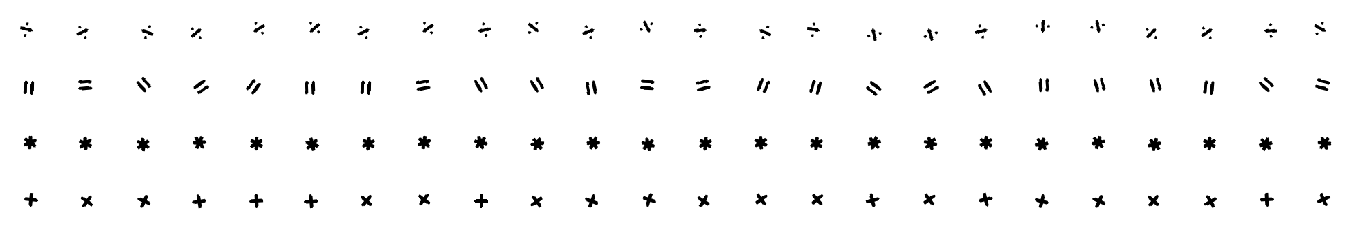

In [6]:
fig, ax = plt.subplots(4, 24, figsize=(24, 4))
for ind, img in zip(range(4), dataset_sign):
    for k in range(24):
        ax[ind,k].imshow(img[k], cmap='gray')
        ax[ind,k].axis('off')

plt.show()